In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
import pandas as pd
import numpy as np
data=pd.read_csv('/content/drive/MyDrive/Data Science practice/DiamondsPrices.csv')

In [102]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [103]:
data.shape

(53940, 10)

In [104]:
data.groupby('cut')['cut'].agg('count')

cut
Fair          1610
Good          4906
Ideal        21551
Premium      13791
Very Good    12082
Name: cut, dtype: int64

In [105]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [106]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [107]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [108]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [109]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


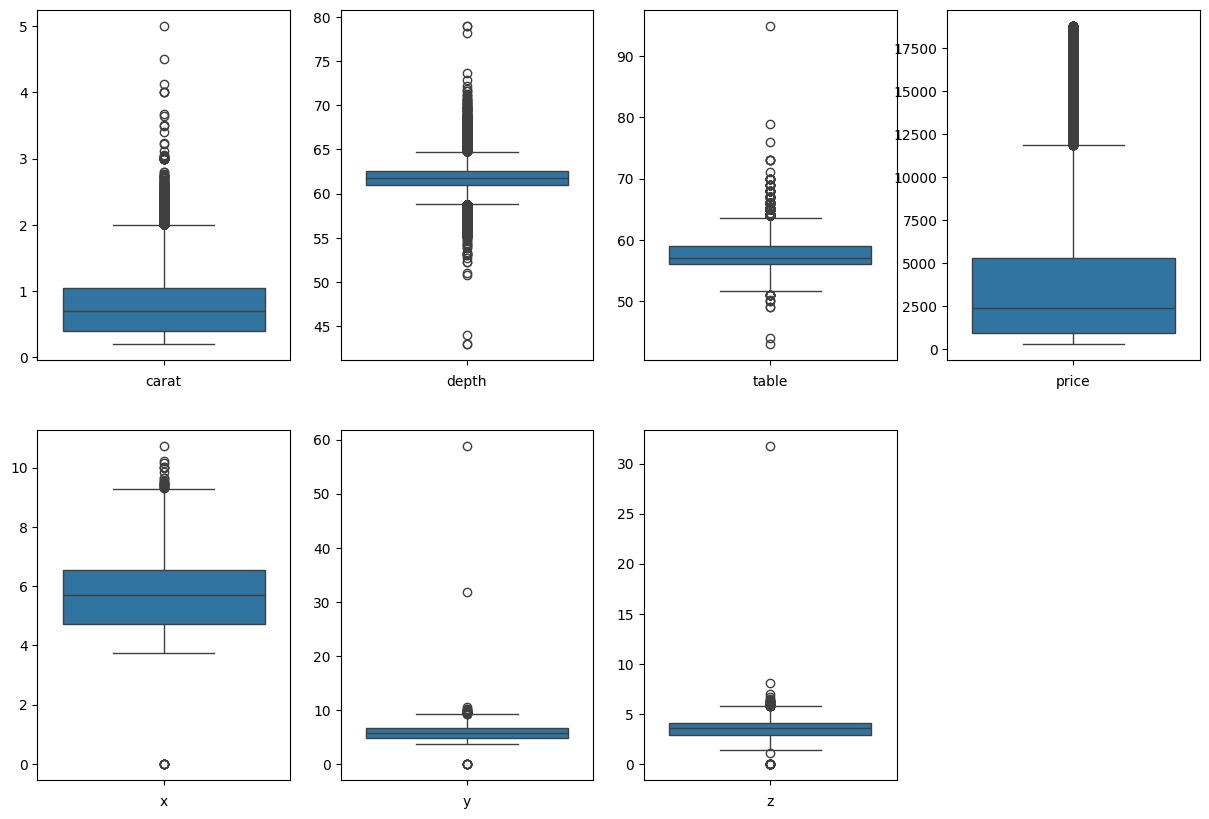

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
cols=['carat','depth','table','price','x','y','z']
pos=1
plt.figure(figsize=(15,10))
for i in cols:
  plt.subplot(2,4,pos)
  sns.boxplot(y=i,data=data)
  pos+=1
  plt.xlabel(i)
  plt.ylabel('')
plt.show()

In [111]:
r=data.copy()

In [112]:
#v=r.copy()
cols=['carat','table','x','y','z','price','depth']
for i in cols:
    q=r[i].quantile([0.25,0.75])
    iqr=q.iloc[1]-q.iloc[0]
    lower=q.iloc[0]-iqr * 1.5
    upper=q.iloc[1]+iqr * 1.5
    r=r[(r[i]>lower)&(r[i]<upper)]


In [113]:
r.describe()

,carat,depth,table,price,x,y,z
count,46147.000000,46147.000000,46147.000000,46147.000000,46147.000000,46147.000000,46147.000000
mean,0.694972,61.808061,57.228141,2974.200425,5.514334,5.519462,3.409754
std,0.359283,1.060164,2.009263,2567.965152,0.960276,0.954556,0.594604
min,0.200000,59.100000,52.000000,326.000000,3.730000,3.680000,1.410000
25%,0.370000,61.200000,56.000000,878.000000,4.620000,4.630000,2.840000
50%,0.580000,61.900000,57.000000,1986.000000,5.380000,5.390000,3.320000
75%,1.010000,62.500000,59.000000,4497.000000,6.390000,6.380000,3.960000
max,1.960000,64.500000,63.400000,10897.000000,8.100000,8.210000,5.060000


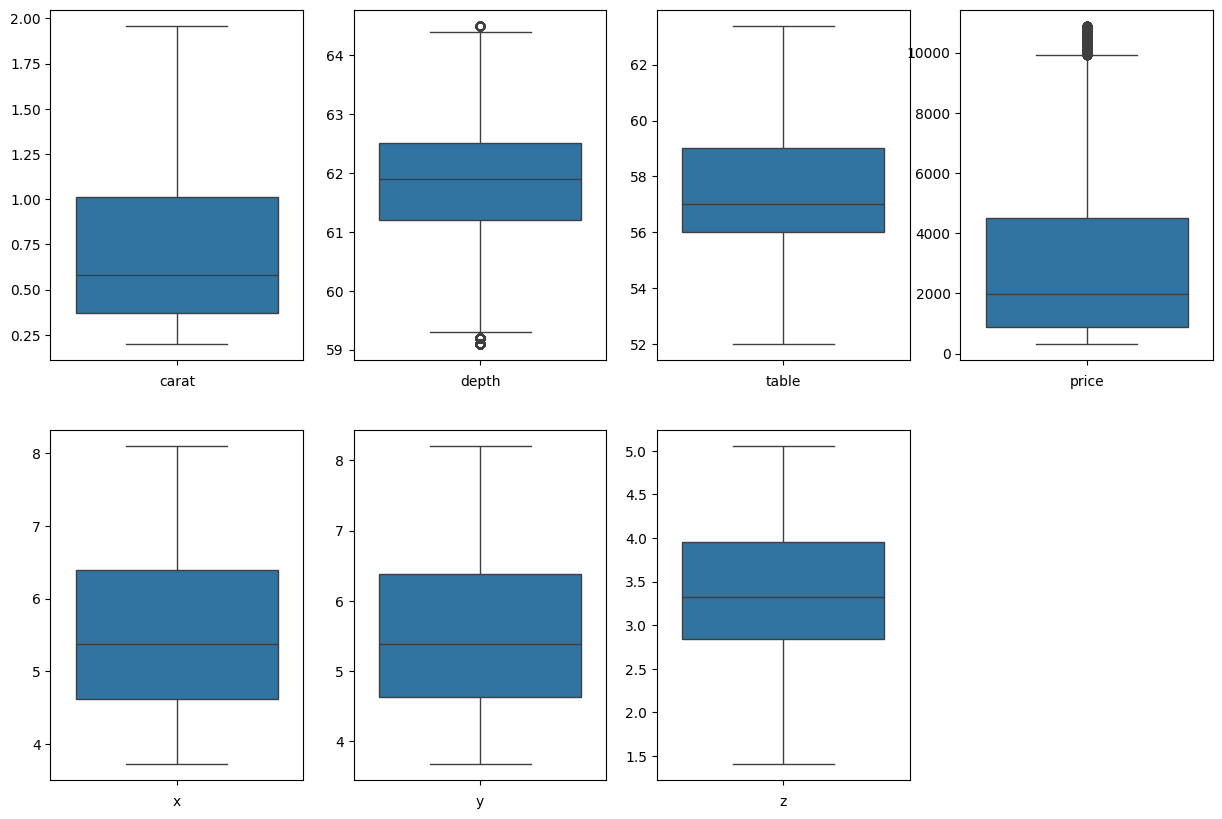

In [114]:
cols=['carat','depth','table','price','x','y','z']
pos=1
plt.figure(figsize=(15,10))
for i in cols:
  plt.subplot(2,4,pos)
  sns.boxplot(y=i,data=r)
  pos+=1
  plt.xlabel(i)
  plt.ylabel('')
plt.show()

In [115]:
r.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [116]:
r['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [117]:
cut_dummies=pd.get_dummies(r['cut']).astype(int)
cut_dummies.drop(columns='Fair',axis='columns',inplace=True)
df1=pd.concat([r,cut_dummies],axis='columns')
df1.drop(columns='cut',axis='columns',inplace=True)
df1.head()

,carat,color,clarity,depth,table,price,x,y,z,Good,Ideal,Premium,Very Good
0,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0
1,0.21,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,0,1,0
3,0.29,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,1,0
4,0.31,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0,0,0
5,0.24,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,0,0,0,1


In [118]:
df1.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [119]:
color_dummies=pd.get_dummies(df1['color']).astype(int)
color_dummies.drop(columns='E',axis='columns',inplace=True)
df2=pd.concat([df1,color_dummies],axis='columns')
df2.drop(columns='color',axis='columns',inplace=True)
df2.head()

,carat,clarity,depth,table,price,x,y,z,Good,Ideal,Premium,Very Good,D,F,G,H,I,J
0,0.23,SI2,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,0,0,0,0
1,0.21,SI1,59.8,61.0,326,3.89,3.84,2.31,0,0,1,0,0,0,0,0,0,0
3,0.29,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,1,0,0,0,0,0,1,0
4,0.31,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0,0,0,0,0,0,0,0,1
5,0.24,VVS2,62.8,57.0,336,3.94,3.96,2.48,0,0,0,1,0,0,0,0,0,1


In [120]:
df2.clarity.unique()

array(['SI2', 'SI1', 'VS2', 'VVS2', 'VVS1', 'VS1', 'I1', 'IF'],
      dtype=object)

In [121]:
clarity_dummies=pd.get_dummies(df2['clarity']).astype(int)
clarity_dummies.drop(columns='IF',axis='columns',inplace=True)
df3=pd.concat([df2,clarity_dummies],axis='columns')
df3.drop(columns='clarity',axis='columns',inplace=True)
df3.head()

,carat,depth,table,price,x,y,z,Good,Ideal,Premium,Very Good,D,F,G,H,I,J,I1,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
5,0.24,62.8,57.0,336,3.94,3.96,2.48,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [122]:
df3.shape

(46147, 24)

In [123]:
X=df3.drop('price',axis='columns')
X.head()

,carat,depth,table,x,y,z,Good,Ideal,Premium,Very Good,D,F,G,H,I,J,I1,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
5,0.24,62.8,57.0,3.94,3.96,2.48,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [124]:
y=df3['price']
y.head()

0    326
1    326
3    334
4    335
5    336
Name: price, dtype: int64

In [125]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=121)

In [126]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.9298531728204985

In [127]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=454)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.92997269, 0.92960834, 0.92864048, 0.92679046, 0.92699604])

**Hyper Parameter Tuning**

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                #'normalize':[True, False]
                'fit_intercept': [True, False],
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random', 'cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores=[]
    cv = ShuffleSplit(n_splits=5, test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.854e+08, tolerance: 2.445e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.719e+09, tolerance: 2.423e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.859e+08, tolerance: 2.446e

,model,best_score,best_params
0,linear_regression,0.928379,{'fit_intercept': True}
1,lasso,0.928016,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.967706,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


**Decision Tree Regression Performed better with 96% accuracy**

In [129]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(criterion='friedman_mse', splitter='best')
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.9669453819000131

In [130]:
pd.set_option('display.max_columns',None)

In [131]:
X_train.head()

,carat,depth,table,x,y,z,Good,Ideal,Premium,Very Good,D,F,G,H,I,J,I1,SI1,SI2,VS1,VS2,VVS1,VVS2
33828,0.32,61.9,54.0,4.41,4.44,2.74,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
34716,0.37,60.4,59.0,4.68,4.62,2.81,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
27970,0.30,62.0,59.0,4.27,4.31,2.66,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
37158,0.32,61.5,56.0,4.44,4.41,2.72,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
11424,1.00,64.1,58.0,6.22,6.32,4.02,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [132]:
y_train.head()

33828     843
34716     874
27970     658
37158     972
11424    5002
Name: price, dtype: int64

In [133]:
def get_estimated_price(carat,depth,table,x_,y,z,cut,color,grade):
  x=np.zeros(len(X.columns))
  x[0]=carat
  x[1]=depth
  x[2]=table
  x[3]=x_
  x[4]=y
  x[5]=z
  if cut in X.columns:
    cut_index=np.where(X.columns==cut)[0][0]
    x[cut_index]=1
  if color in X.columns:
    color_index=np.where(X.columns==color)[0][0]
    x[color_index]=1
  if grade in X.columns:
    grade_index=np.where(X.columns==grade)[0][0]
    x[grade_index]=1
  return model.predict([x])[0]

In [134]:
get_estimated_price(0.32,61.9,54,4.41,4.44,2.74,'Ideal','E','VVS2')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


843.0

**Exporting the model to pickle file**

In [135]:
import pickle
with open('diamond_price_model.pickle','wb') as f:
    pickle.dump(model,f)

In [136]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))